In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kms
from sklearn.datasets import make_blobs

In [148]:
final_df = pd.read_csv('data/final_df.csv')
final_df

,Unnamed: 0,name,num_bear,Country,Corporate tax,pagerank_score,CPI score 2015,eigen_score
0,0,DECARIA COMPANY LTD.,2,Samoa,27.0,0.413582,52,4.802
1,1,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,2.063801,52,19.208
2,2,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,2.063801,52,1.200
3,3,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,0.151301,52,19.208
4,4,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,0.151301,52,1.200
...,...,...,...,...,...,...,...,...
36690,36690,SUZANNE CORP.,2,India,22.0,0.575000,38,7.203
36691,36691,HANSAN CORP.,2,India,22.0,0.447500,38,7.203
36692,36692,SAUCHER HOLDING CORPORATION,2,Kenya,30.0,0.787500,25,6.002
36693,36693,Flexi-mobile Limited,2,Kenya,30.0,0.298750,25,3.601


In [149]:
# final_df.groupby('name').sum()

In [150]:
# final_df[final_df['name']=='DECARIA COMPANY LTD.']

In [151]:
# df = final_df(final_df,columns=['num_bear','Corporate tax', 'pagerank_score', 'CPI score 2015'])
  
# kmeans = KMeans(n_clusters=4).fit(df)
# centroids = kmeans.cluster_centers_
# print(centroids)

# plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

In [152]:
final_df

,Unnamed: 0,name,num_bear,Country,Corporate tax,pagerank_score,CPI score 2015,eigen_score
0,0,DECARIA COMPANY LTD.,2,Samoa,27.0,0.413582,52,4.802
1,1,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,2.063801,52,19.208
2,2,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,2.063801,52,1.200
3,3,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,0.151301,52,19.208
4,4,DRAGONTLY TELECOMMUNICATIONS INC.,15,Samoa,27.0,0.151301,52,1.200
...,...,...,...,...,...,...,...,...
36690,36690,SUZANNE CORP.,2,India,22.0,0.575000,38,7.203
36691,36691,HANSAN CORP.,2,India,22.0,0.447500,38,7.203
36692,36692,SAUCHER HOLDING CORPORATION,2,Kenya,30.0,0.787500,25,6.002
36693,36693,Flexi-mobile Limited,2,Kenya,30.0,0.298750,25,3.601


In [153]:
df = final_df.drop(columns=['Unnamed: 0', 'name', 'Country'])
df.head()

,num_bear,Corporate tax,pagerank_score,CPI score 2015,eigen_score
0,2,27.0,0.413582,52,4.802
1,15,27.0,2.063801,52,19.208
2,15,27.0,2.063801,52,1.200
3,15,27.0,0.151301,52,19.208
4,15,27.0,0.151301,52,1.200


In [154]:
# # Convert DataFrame to matrix
# mat = df.values
# # Using sklearn
# km = kms(n_clusters=5)
# km.fit(mat)
# # Get cluster assignment labels
# labels = km.labels_
# # Format results as a DataFrame
# results = pd.DataFrame([df.index,labels]).T
# results[1].nunique()


In [155]:
# km.labels_

In [156]:
# km.inertia_

In [157]:
# results

In [159]:
kmeans = kms(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['num_bear', 'Corporate tax', 'pagerank_score', 'CPI score 2015', 'eigen_score']])
df

,num_bear,Corporate tax,pagerank_score,CPI score 2015,eigen_score,cluster
0,2,27.0,0.413582,52,4.802,2
1,15,27.0,2.063801,52,19.208,2
2,15,27.0,2.063801,52,1.200,2
3,15,27.0,0.151301,52,19.208,2
4,15,27.0,0.151301,52,1.200,2
...,...,...,...,...,...,...
36690,2,22.0,0.575000,38,7.203,2
36691,2,22.0,0.447500,38,7.203,2
36692,2,30.0,0.787500,25,6.002,2
36693,2,30.0,0.298750,25,3.601,2


In [160]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
cen_y

[18.57975101162919, 20.0, 21.880715750836877]

In [161]:
from sklearn.decomposition import PCA 
pcastan = PCA(3)
pcastan.fit(df)
pca_stan = pd.DataFrame(pcastan.transform(df)) 
pca_stan.head()
# pcastan

,0,1,2
0,-3.002692e+07,21.041855,7.224791
1,-3.002691e+07,21.295946,8.219443
2,-3.002692e+07,21.295946,8.219443
3,-3.002691e+07,21.291784,8.207540
4,-3.002692e+07,21.291784,8.207540


In [162]:
kmeansPCAStand = kms(n_clusters = 3) 
kmeansPCAStand.fit(pca_stan) 
# print(kmeansPCAStand.inertia_)
pd.Series(kmeansPCAStand.labels_).value_counts()

0    27425
2     9269
1        1
dtype: int64

In [163]:
colors = ['#DF2020', '#81DF20', '#2095DF']
colors

['#DF2020', '#81DF20', '#2095DF']

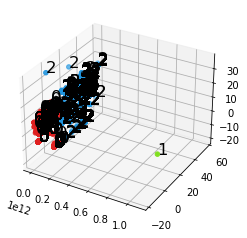

In [164]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_stan[0], pca_stan[1], pca_stan[2],  
           c = list(map(lambda label : colors[label], 
                                            kmeansPCAStand.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeansPCAStand.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_stan[0], pca_stan[1], 
        pca_stan[2], str_labels)) 
   
plt.show() 
# cluster 1 was VERSE DEVELOPMENT CORP.; had 4 num_bear

In [165]:
# df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
# df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# df

In [122]:
# colors = ['#DF2020', '#81DF20', '#2095DF', '#4F4F4F', '#E6E6FA']
# df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
# df

In [123]:
# import matplotlib.pyplot as plt
# fig = plt.figure() 
# ax = fig.add_subplot(111, projection = '3d') 
# ax.scatter(
#     df['num_bear'], df['Corporate tax'], df['pagerank_score'], df['CPI score 2015'], df['eigen_score'], 
#     c=df.c, alpha = 0.6, s=10
#     )

In [45]:
# centroids = km.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]
# cen_y

In [124]:
# results[1].value_counts()

In [125]:
# results

In [126]:
# results['name'] = final_df['name']
# results['cluster'] = results[1]
# results = results.drop(columns=[0,1])
# results #base_clusters

In [136]:
# results[results['cluster']==1]

In [22]:
#viz

In [128]:
# from mpl_toolkits.mplot3d import Axes3D 
# import matplotlib.pyplot as plt 
   
# fig = plt.figure() 
# ax = fig.add_subplot(111, projection = '3d') 
# ax.scatter(pca_stan[0], pca_stan[1], pca_stan[2],  
#            c = list(map(lambda label : cluster_colors[label], 
#                                             kmeansPCAStand.labels_))) 
   
# str_labels = list(map(lambda label:'% s' % label, kmeansPCAStand.labels_)) 
   
# list(map(lambda data1, data2, data3, str_label: 
#         ax.text(data1, data2, data3, s = str_label, size = 16.5, 
#         zorder = 20, color = 'k'), pca_stan[0], pca_stan[1], 
#         pca_stan[2], str_labels)) 
   
# plt.show() 
#https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489


In [166]:
# results[results['name']=='VERSE DEVELOPMENT CORP.']